# H - CLUSTERING OF TELECOM CUST CHURN

Lets import our libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [85]:
df = pd.read_excel('Telco_customer_churn.xlsx')
df.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


Lets perform EDA on our dataset

In [21]:
data = df.copy()

In [22]:
data.shape

(7043, 30)

In [23]:
data.isnull().sum()  # No Missing value in the data

Customer ID                          0
Count                                0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges            

In [24]:
data.duplicated().sum() # No Duplicate data in the dataset

0

In [25]:
data.describe(include='all')

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043,7043.0,7043,7043,7043.000000,7043.000000,7043,7043,7043.000000,7043,...,7043,7043,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
unique,7043,NaN,1,2,NaN,NaN,6,2,NaN,2,...,2,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,2105-PHWON,NaN,Q3,No,NaN,NaN,None,Yes,NaN,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,7043,3821,NaN,NaN,3877,6361,NaN,4072,...,4745,3610,4171,3909,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.0,NaN,NaN,1.951867,32.386767,NaN,NaN,22.958954,NaN,...,NaN,NaN,NaN,NaN,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,NaN,0.0,NaN,NaN,3.001199,24.542061,NaN,NaN,15.448113,NaN,...,NaN,NaN,NaN,NaN,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,NaN,1.0,NaN,NaN,0.000000,1.000000,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,NaN,1.0,NaN,NaN,0.000000,9.000000,NaN,NaN,9.210000,NaN,...,NaN,NaN,NaN,NaN,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,NaN,1.0,NaN,NaN,0.000000,29.000000,NaN,NaN,22.890000,NaN,...,NaN,NaN,NaN,NaN,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,NaN,1.0,NaN,NaN,3.000000,55.000000,NaN,NaN,36.395000,NaN,...,NaN,NaN,NaN,NaN,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000


In [26]:
data.describe()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,0.0,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,1.0,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,1.0,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,1.0,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,1.0,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,1.0,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

Since dataset has categorical and numerical values, lets create dummy variables for our categorical variables

In [28]:
df.head(3)

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88


We will also drop `Customer ID`, `Count`, `Quarter` columns as they do not provide any additional information to our data

In [29]:
data.columns

Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [30]:
cols = ['Customer ID', 'Count', 'Quarter']
new_data = data.drop(columns=cols)
new_data.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,No,0,1,None,No,0.00,No,Yes,DSL,8,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


First the columns where we have Yes or No data, we can simply change them to 1 and 0, 1 for Yes and 0 for No

In [31]:
new_data['Referred a Friend'] = new_data['Referred a Friend'].map({'Yes': 1, "No": 0})
new_data.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0,0,1,None,No,0.00,No,Yes,DSL,8,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,1,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,0,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,1,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,1,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [32]:
new_data = new_data.replace(to_replace='Yes', value = 1)
new_data = new_data.replace(to_replace='No', value = 0)
new_data.head()


,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0,0,1,None,0,0.00,0,1,DSL,8,...,0,Month-to-Month,1,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,1,1,8,Offer E,1,48.85,1,1,Fiber Optic,17,...,1,Month-to-Month,1,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,0,0,18,Offer D,1,11.33,1,1,Fiber Optic,52,...,1,Month-to-Month,1,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,1,1,25,Offer C,1,19.76,0,1,Fiber Optic,12,...,1,Month-to-Month,1,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,1,1,37,Offer C,1,6.33,1,1,Fiber Optic,14,...,1,Month-to-Month,1,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [33]:
new_data.describe(include='all')

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,...,7043.000000,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
unique,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,4,NaN,...,NaN,3,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,Fiber Optic,NaN,...,NaN,Month-to-Month,NaN,Bank Withdrawal,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,3877,NaN,NaN,NaN,NaN,3035,NaN,...,NaN,3610,NaN,3909,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.457476,1.951867,32.386767,NaN,0.903166,22.958954,0.421837,0.783331,NaN,20.515405,...,0.673719,NaN,0.592219,NaN,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,0.498224,3.001199,24.542061,NaN,0.295752,15.448113,0.493888,0.412004,NaN,20.418940,...,0.468885,NaN,0.491457,NaN,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,...,0.000000,NaN,0.000000,NaN,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,0.000000,0.000000,9.000000,NaN,1.000000,9.210000,0.000000,1.000000,NaN,3.000000,...,0.000000,NaN,0.000000,NaN,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,0.000000,0.000000,29.000000,NaN,1.000000,22.890000,0.000000,1.000000,NaN,17.000000,...,1.000000,NaN,1.000000,NaN,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,1.000000,3.000000,55.000000,NaN,1.000000,36.395000,1.000000,1.000000,NaN,27.000000,...,1.000000,NaN,1.000000,NaN,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000


For other columns where we have more then two categories, we will use get dummies from PD 

Columns would be `Offer`, `Internet Type`, `Contract`, `Payment Method`

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
new_data = pd.get_dummies(new_data, columns=['Offer'])
new_data.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,...,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E
0,0,0,1,0,0.00,0,1,DSL,8,0,...,0.00,20,0.00,59.65,1,0,0,0,0,0
1,1,1,8,1,48.85,1,1,Fiber Optic,17,0,...,0.00,0,390.80,1024.10,0,0,0,0,0,1
2,0,0,18,1,11.33,1,1,Fiber Optic,52,0,...,45.61,0,203.94,1910.88,0,0,0,0,1,0
3,1,1,25,1,19.76,0,1,Fiber Optic,12,0,...,13.43,0,494.00,2995.07,0,0,0,1,0,0
4,1,1,37,1,6.33,1,1,Fiber Optic,14,0,...,0.00,0,234.21,3102.36,0,0,0,1,0,0


In [36]:
new_data = pd.get_dummies(new_data, columns=['Internet Type', 'Contract', 'Payment Method'])
new_data.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,0,0,1,0,0.00,0,1,8,0,0,...,0,1,0,0,1,0,0,1,0,0
1,1,1,8,1,48.85,1,1,17,0,1,...,0,0,1,0,1,0,0,0,1,0
2,0,0,18,1,11.33,1,1,52,0,0,...,0,0,1,0,1,0,0,1,0,0
3,1,1,25,1,19.76,0,1,12,0,1,...,0,0,1,0,1,0,0,1,0,0
4,1,1,37,1,6.33,1,1,14,0,0,...,0,0,1,0,1,0,0,1,0,0


In [37]:
new_data.shape

(7043, 39)

In [38]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   int64  
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Phone Service                      7043 non-null   int64  
 4   Avg Monthly Long Distance Charges  7043 non-null   float64
 5   Multiple Lines                     7043 non-null   int64  
 6   Internet Service                   7043 non-null   int64  
 7   Avg Monthly GB Download            7043 non-null   int64  
 8   Online Security                    7043 non-null   int64  
 9   Online Backup                      7043 non-null   int64  
 10  Device Protection Plan             7043 non-null   int64  
 11  Premium Tech Support               7043 non-null   int64

Lets Visualiza our data

In [49]:
new_data.columns

Index(['Referred a Friend', 'Number of Referrals', 'Tenure in Months',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Avg Monthly GB Download', 'Online Security',
       'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
       'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Offer_None', 'Offer_Offer A', 'Offer_Offer B',
       'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E',
       'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_None', 'Contract_Month-to-Month', 'Contract_One Year',
       'Contract_Two Year', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check'],
      dtype='object')

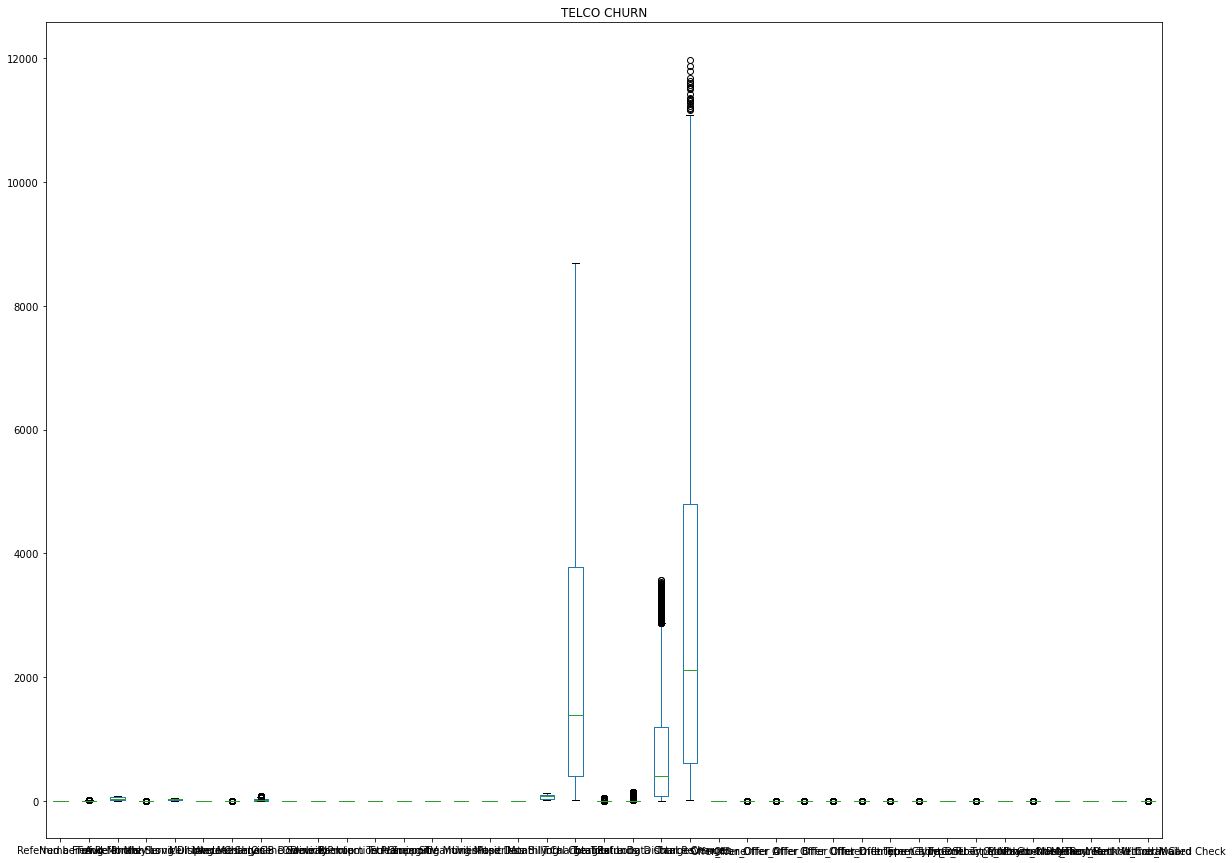

In [51]:
plt.rcParams['figure.figsize'] = (20,15)
new_data[['Referred a Friend', 'Number of Referrals', 'Tenure in Months',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Avg Monthly GB Download', 'Online Security',
       'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
       'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Offer_None', 'Offer_Offer A', 'Offer_Offer B',
       'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E',
       'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_None', 'Contract_Month-to-Month', 'Contract_One Year',
       'Contract_Two Year', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check']].plot(kind='box', title='TELCO CHURN')
plt.show()

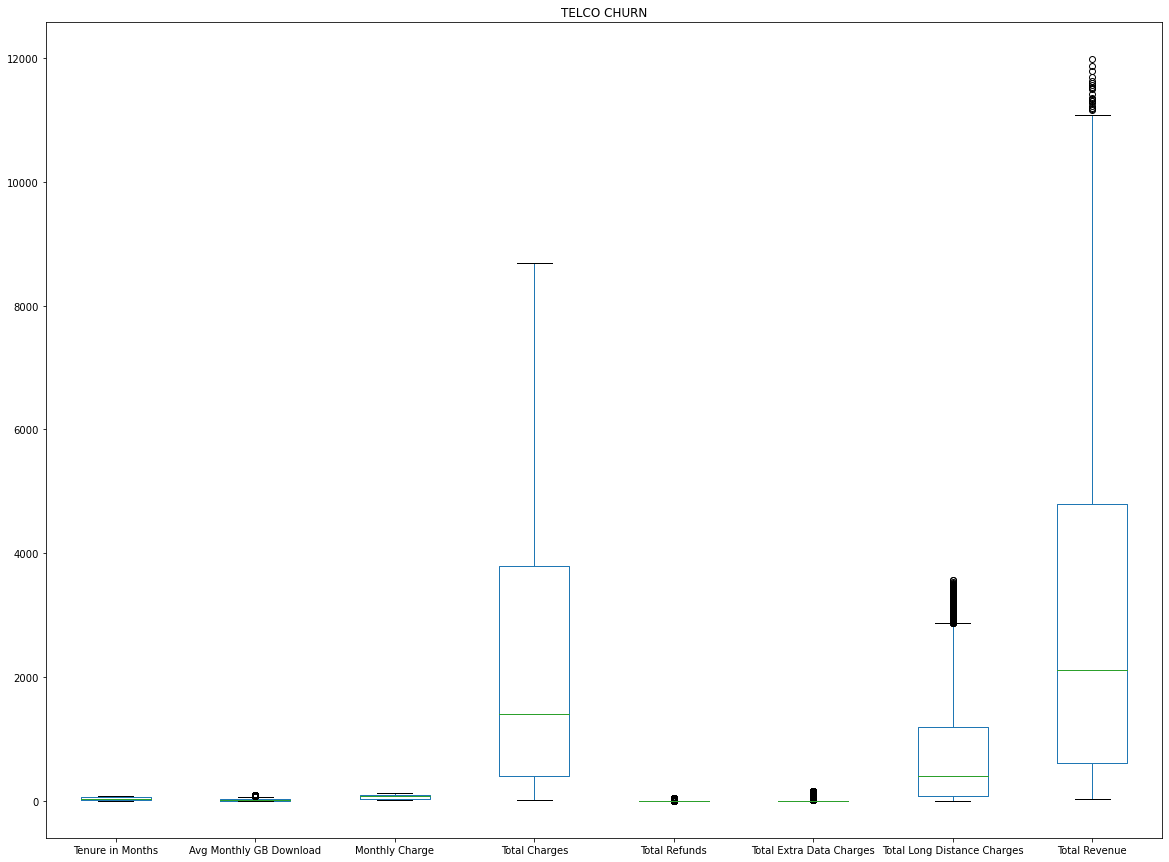

In [54]:
plt.rcParams['figure.figsize'] = (20,15)
new_data[['Tenure in Months','Avg Monthly GB Download','Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue']].plot(kind='box', title = 'TELCO CHURN')
plt.show()

Lets see how many outliers we have in each column

<AxesSubplot:>

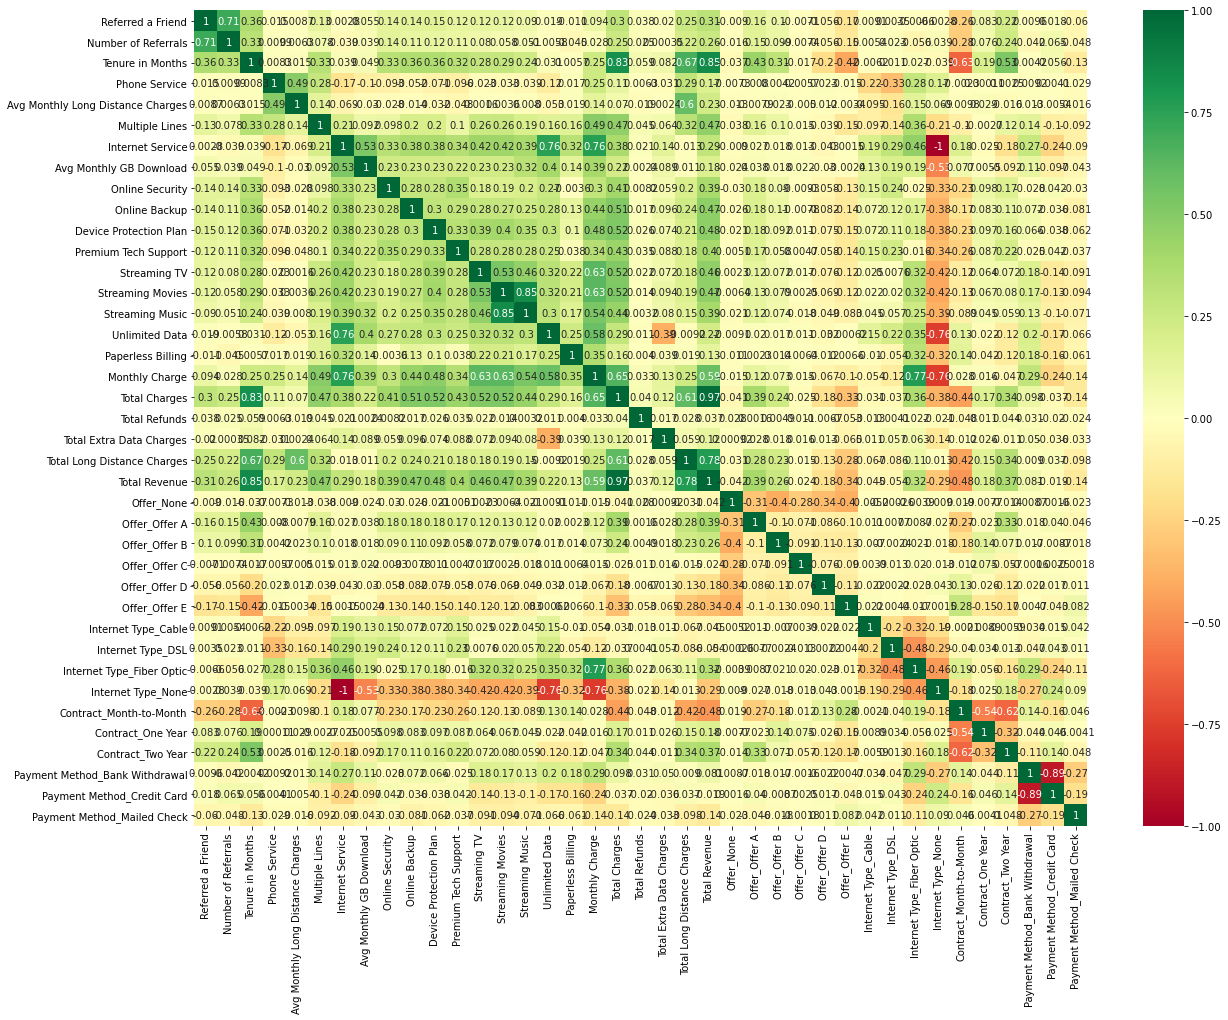

In [56]:
sns.heatmap(new_data.corr(), annot= True, cmap = 'RdYlGn')

In [63]:
new_data = new_data.astype(int) # Converting every column into int

Lets look for Outliers in each columns as we can see there are some outliers in the data

In [67]:
Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)

IQR = Q3 - Q1

IQR

outlier = (new_data < (Q1 - 1.5 * IQR)) |(new_data > (Q3 + 1.5 * IQR))
outlier.sum()

Referred a Friend                       0
Number of Referrals                   676
Tenure in Months                        0
Phone Service                         682
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                     1526
Avg Monthly GB Download               362
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Paperless Billing                       0
Monthly Charge                          0
Total Charges                           0
Total Refunds                         525
Total Extra Data Charges              728
Total Long Distance Charges           196
Total Revenue                          21
Offer_None                        

In [65]:
new_data[['Number of Referrals','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge',
         'Total Charges','Total Long Distance Charges','Total Revenue']].describe()

,Number of Referrals,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.951867,22.514128,20.515405,64.295897,2279.911401,748.663922,3033.880449
std,3.001199,15.371252,20.418940,30.092727,2266.217521,846.610904,2865.209529
min,0.000000,0.000000,0.000000,18.000000,18.000000,0.000000,21.000000
25%,0.000000,9.000000,3.000000,35.000000,400.000000,70.000000,605.000000
50%,0.000000,22.000000,17.000000,70.000000,1394.000000,401.000000,2108.000000
75%,3.000000,36.000000,27.000000,89.000000,3786.500000,1190.500000,4800.500000
max,11.000000,49.000000,85.000000,118.000000,8684.000000,3564.000000,11979.000000


Lets Normalize our data

In [68]:
def norm_func(i):
    x = (i-i.min()) / (i.max()- i.min())
    return(x)
norm = new_data.copy()

df_norm = norm_func(norm)
df_norm.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.094118,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.090909,0.098592,1.0,0.979592,1.0,1.0,0.200000,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000000,0.239437,1.0,0.224490,1.0,1.0,0.611765,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.090909,0.338028,1.0,0.387755,0.0,1.0,0.141176,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.090909,0.507042,1.0,0.122449,1.0,1.0,0.164706,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Lets start clustering

In [69]:
from sklearn.cluster import AgglomerativeClustering

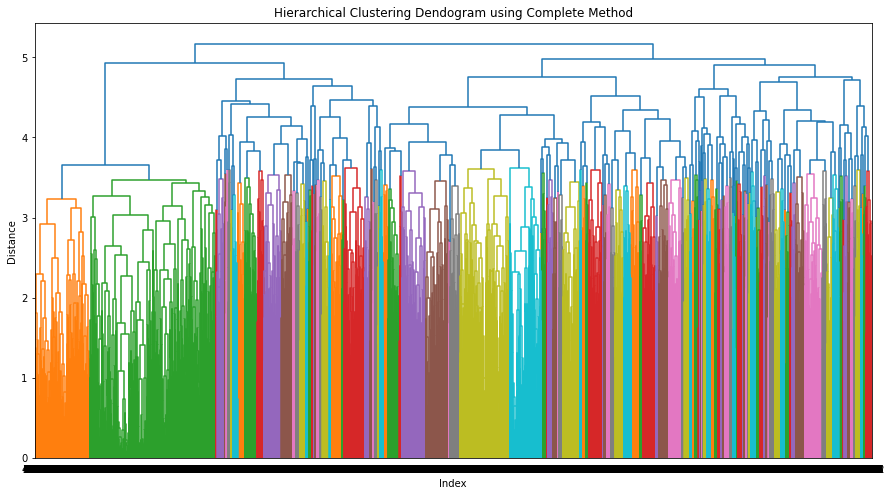

In [70]:
z = linkage(df_norm, method = 'complete', metric = 'euclidean')
plt.figure(figsize= (15,8));plt.title("Hierarchical Clustering Dendogram using Complete Method");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

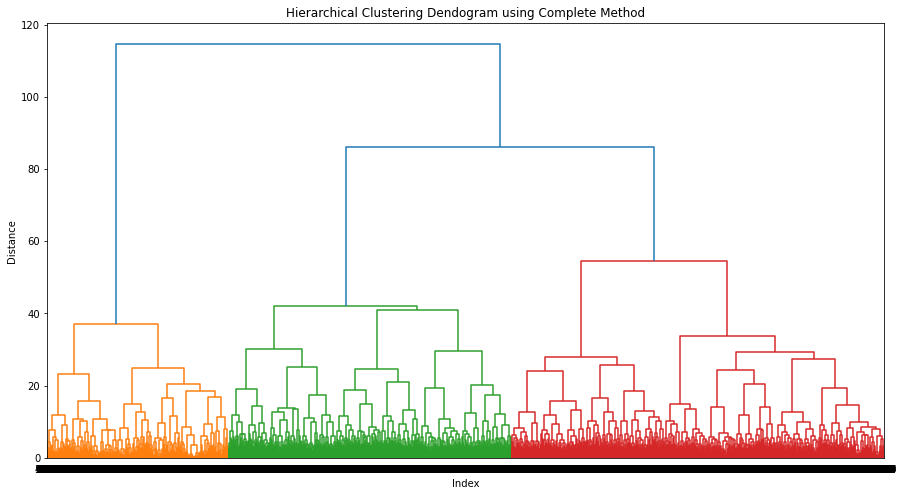

In [71]:
z_ward = linkage(df_norm, method = 'ward', metric = 'euclidean')
plt.figure(figsize= (15,8));plt.title("Hierarchical Clustering Dendogram using Ward Method");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z_ward, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

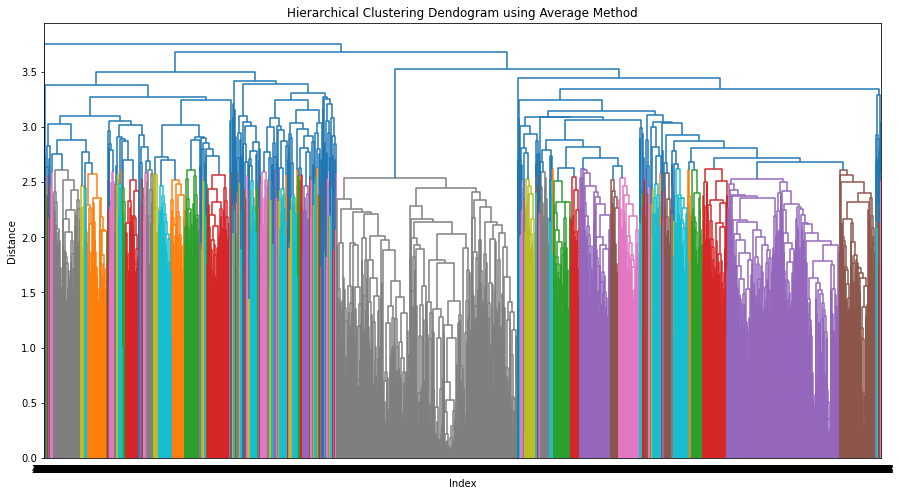

In [72]:
z_average = linkage(df_norm, method = 'average', metric = 'euclidean')
plt.figure(figsize= (15,8));plt.title("Hierarchical Clustering Dendogram using Average Method");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z_average, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

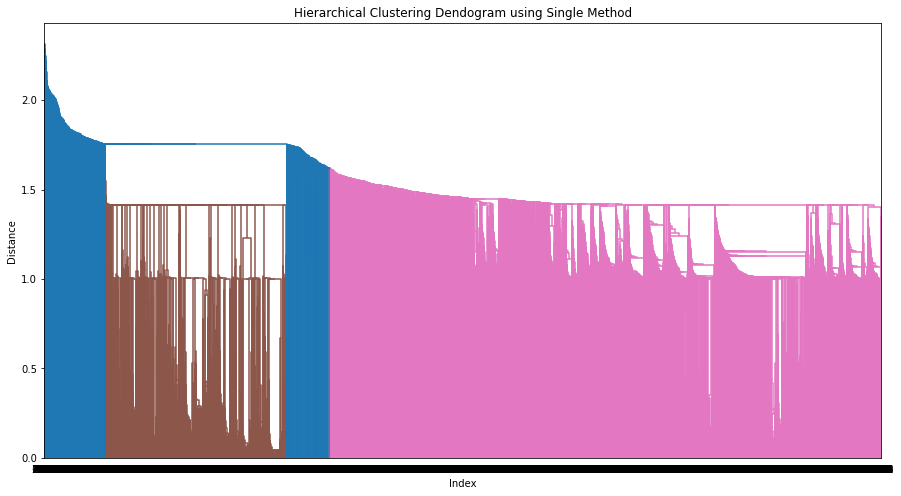

In [73]:
z_single = linkage(df_norm, method = 'single', metric = 'euclidean')
plt.figure(figsize= (15,8));plt.title("Hierarchical Clustering Dendogram using Single Method");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z_single, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

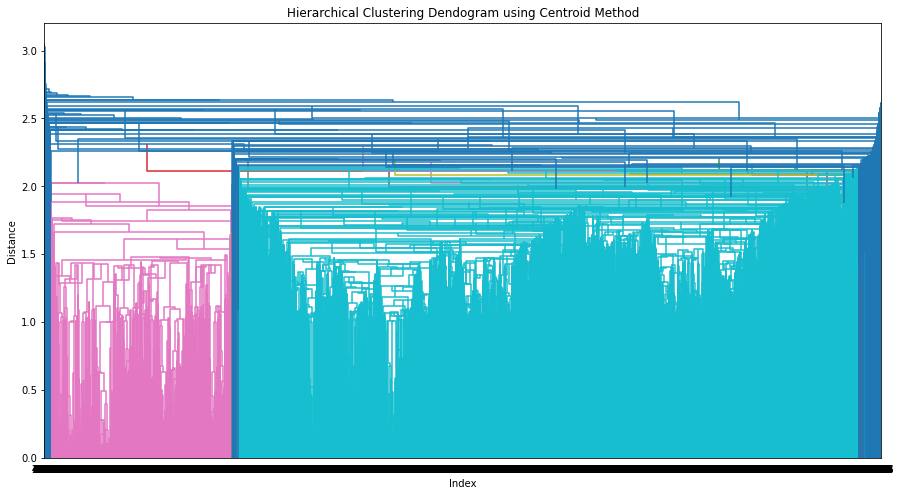

In [74]:
z_centroid = linkage(df_norm, method = 'centroid', metric = 'euclidean')
plt.figure(figsize= (15,8));plt.title("Hierarchical Clustering Dendogram using Centroid Method");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z_centroid, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

From the above visualizations we can see WARD with ECULIDEAN has best option of clustering data into 4 or 3 clusters

In [76]:
h_ward = AgglomerativeClustering(n_clusters=3, linkage = 'ward', affinity='euclidean').fit(df_norm)
h_ward.labels_

array([0, 0, 0, ..., 2, 0, 2], dtype=int64)

In [77]:
cluster_labels = pd.Series(h_ward.labels_)

In [88]:
cluster_data = new_data.copy()

In [89]:
cluster_data['clust'] = cluster_labels
cluster_data

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,clust
0,0,0,1,0,0,0,1,8,0,0,...,1,0,0,1,0,0,1,0,0,0
1,1,1,8,1,48,1,1,17,0,1,...,0,1,0,1,0,0,0,1,0,0
2,0,0,18,1,11,1,1,52,0,0,...,0,1,0,1,0,0,1,0,0,0
3,1,1,25,1,19,0,1,12,0,1,...,0,1,0,1,0,0,1,0,0,0
4,1,1,37,1,6,1,1,14,0,0,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,72,1,22,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
7039,1,1,24,1,36,1,1,24,1,0,...,0,0,0,0,1,0,0,0,1,0
7040,1,4,72,1,29,1,1,59,0,1,...,0,1,0,0,1,0,0,1,0,2
7041,1,1,11,0,0,0,1,17,1,0,...,1,0,0,1,0,0,1,0,0,0


In [90]:
cluster_data.columns

Index(['Referred a Friend', 'Number of Referrals', 'Tenure in Months',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Avg Monthly GB Download', 'Online Security',
       'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
       'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Offer_None', 'Offer_Offer A', 'Offer_Offer B',
       'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E',
       'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_None', 'Contract_Month-to-Month', 'Contract_One Year',
       'Contract_Two Year', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check', 'clust'],
      dtype='object')

In [92]:
cluster_data1 = cluster_data[['clust','Referred a Friend', 'Number of Referrals', 'Tenure in Months',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Avg Monthly GB Download', 'Online Security',
       'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
       'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Offer_None', 'Offer_Offer A', 'Offer_Offer B',
       'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E',
       'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_None', 'Contract_Month-to-Month', 'Contract_One Year',
       'Contract_Two Year', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check']]

In [93]:
cluster_data1

,clust,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,...,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,0,0,0,1,0,0,0,1,8,0,...,0,1,0,0,1,0,0,1,0,0
1,0,1,1,8,1,48,1,1,17,0,...,0,0,1,0,1,0,0,0,1,0
2,0,0,0,18,1,11,1,1,52,0,...,0,0,1,0,1,0,0,1,0,0
3,0,1,1,25,1,19,0,1,12,0,...,0,0,1,0,1,0,0,1,0,0
4,0,1,1,37,1,6,1,1,14,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,72,1,22,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
7039,0,1,1,24,1,36,1,1,24,1,...,1,0,0,0,0,1,0,0,0,1
7040,2,1,4,72,1,29,1,1,59,0,...,0,0,1,0,0,1,0,0,1,0
7041,0,1,1,11,0,0,0,1,17,1,...,0,1,0,0,1,0,0,1,0,0


In [94]:
cluster_data2 = cluster_data1.iloc[:,1:].groupby(cluster_data1['clust']).mean()
cluster_data2

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
clust,,,,,,,,,,,,,,,,,,,,,
0,0.328549,1.117065,17.301116,0.880064,21.928549,0.394896,1.0,25.466986,0.211483,0.289314,...,0.140989,0.263158,0.595853,0.0,0.922169,0.033174,0.044657,0.684211,0.257097,0.058692
1,0.454784,2.174312,30.586501,1.000000,24.477064,0.224115,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,0.339450,0.239843,0.420708,0.297510,0.608781,0.093709
2,0.628883,2.908060,53.394626,0.871537,22.027288,0.583963,1.0,27.141478,0.569270,0.638959,...,0.162888,0.347187,0.489924,0.0,0.084383,0.453401,0.462217,0.549958,0.425693,0.024349


In [95]:
cluster_data2.to_csv("Telecom_Churn_Cluster_WARD_EUCLIDEAN.csv", encoding='utf8')

In [96]:
h_ward = AgglomerativeClustering(n_clusters=4, linkage = 'ward', affinity='euclidean').fit(df_norm)
h_ward.labels_

array([3, 2, 2, ..., 0, 3, 0], dtype=int64)

In [97]:
cluster_labels = pd.Series(h_ward.labels_)
cluster_data = new_data.copy()
cluster_data['clust'] = cluster_labels
cluster_data1 = cluster_data[['clust','Referred a Friend', 'Number of Referrals', 'Tenure in Months',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Avg Monthly GB Download', 'Online Security',
       'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
       'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Offer_None', 'Offer_Offer A', 'Offer_Offer B',
       'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E',
       'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_None', 'Contract_Month-to-Month', 'Contract_One Year',
       'Contract_Two Year', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check']]
cluster_data2 = cluster_data1.iloc[:,1:].groupby(cluster_data1['clust']).mean()
cluster_data2

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
clust,,,,,,,,,,,,,,,,,,,,,
0,0.628883,2.908060,53.394626,0.871537,22.027288,0.583963,1.0,27.141478,0.569270,0.638959,...,0.162888,0.347187,0.489924,0.0,0.084383,0.453401,0.462217,0.549958,0.425693,0.024349
1,0.454784,2.174312,30.586501,1.000000,24.477064,0.224115,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,0.339450,0.239843,0.420708,0.297510,0.608781,0.093709
2,0.342873,1.117711,18.632829,0.997300,24.949244,0.535637,1.0,24.327754,0.162527,0.295896,...,0.009719,0.014579,0.975702,0.0,0.900108,0.041037,0.058855,0.777538,0.213823,0.008639
3,0.307872,1.116134,15.378800,0.710834,17.568200,0.191738,1.0,27.111458,0.282151,0.279813,...,0.330475,0.621980,0.047545,0.0,0.954014,0.021824,0.024162,0.549493,0.319564,0.130943


In [98]:
cluster_data2.to_csv("Telecom_Churn_Cluster_WARD_EUCLIDEAN_4_Clusters.csv", encoding='utf8')

### Based on the above clusters, it is better to have 3 clusters then 4 clusters ###